# Testing machine learning algorithms in data provided by Chung, 1980

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn
seaborn.set(style="ticks")

## Dataset Description

### Dataset description

X -> X coordinate in grid<br/><br/>
Y -> Y coordinate in grid<br/><br/>
V1 -> Ocurrences of volcanic rock type 1 in cell coordinate (X,Y)<br/><br/>
V2 -> Ocurrences of volcanic rock type 2 in cell coordinate (X,Y)<br/><br/>
V3 -> Ocurrences of volcanic rock type 3 in cell coordinate (X,Y)<br/><br/>
V4 -> Ocurrences of volcanic rock type 4 in cell coordinate (X,Y)<br/><br/>
V5 -> Ocurrences of volcanic rock type 5 in cell coordinate (X,Y)<br/><br/>
VMS Deposits -> VMS Deposit in cell coordinate (X,Y)<br/><br/>

### Rock types (obtained by superimposing a grid over the geological map)

V1 -> Lower Silurian felsic volcanics<br/><br/>
V2 -> Middle-Uper Ordovician mixed (felsic - mafic) volcanics<br/><br/>
V3 -> Lower Ordovician mafic volcanics<br/><br/>
V4 -> Lower Ordovician mixed volcanics<br/><br/>
V5 -> Cambrian mafic volcanics<br/><br/>




In [2]:
df = pd.read_excel("deposits.xlsx")

In [ ]:
df.head()

,X,Y,V1,V2,V3,V4,V5,VMS Deposits
0,24,47,0,0,0,44,0,0
1,24,48,56,0,0,81,0,0
2,24,49,161,0,0,23,0,0
3,24,50,24,0,0,45,0,0
4,24,51,62,0,0,22,0,0


In [ ]:
df.describe()

,X,Y,V1,V2,V3,V4,V5,VMS Deposits
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,27.15000,49.383333,40.766667,72.366667,52.800000,14.083333,11.200000,0.416667
std,2.12192,2.511611,80.000290,115.416852,101.381441,40.514192,42.570301,0.849560
min,24.00000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.00000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.00000,51.250000,39.250000,133.250000,60.250000,0.000000,0.000000,0.250000
max,31.00000,53.000000,317.000000,378.000000,394.000000,219.000000,254.000000,4.000000


## Dataset visualization

In [ ]:
def plot_grid(df=df, x="X", y="Y", hue="VMS Deposits"):
    """Plot facet grid of X,Y and associated deposits, count of volcanic rocks by type
    
    """
    dfcop = df.copy()
    dfcop.sort_values(by=[hue])
    fg = seaborn.FacetGrid(data=dfcop, hue=hue, palette="viridis", aspect=1.61)
    fg.map(plt.scatter, x, y).add_legend()
    fg.fig.suptitle(f'{hue} by Cell Coordinate')
    fg.set(ylim=(42, 55))
    fg.set(xlim=(22, 33))

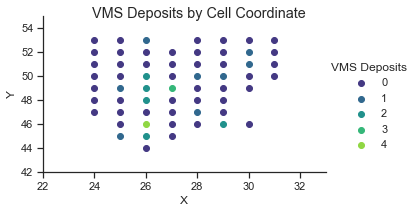

In [ ]:
plot_grid()

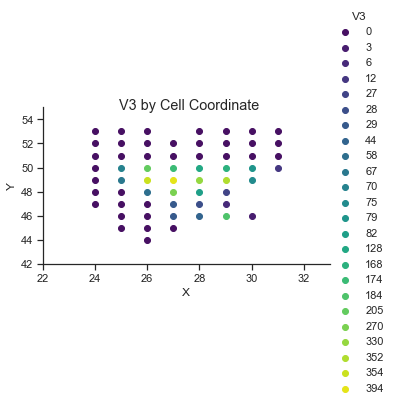

In [ ]:
plot_grid(hue="V3")

<IPython.core.display.Javascript object>

<AxesSubplot:>

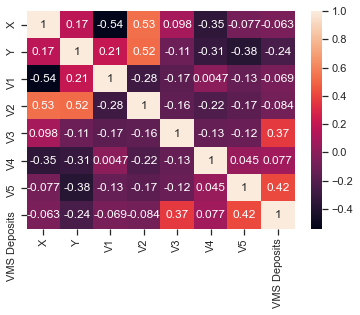

In [ ]:
sns.heatmap(df.corr(), annot=True)

## Dataset Division into train and test

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [7]:
print(len(train))
print(len(test))

47
13


In [16]:
X_train, y_train =train.drop("VMS Deposits", axis=1),  train["VMS Deposits"]
X_test, y_test =test.drop("VMS Deposits", axis=1),  test["VMS Deposits"]


### Dataset is not sufficient for many of this algorithms, just leaving the layout 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10,weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear',gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators = 120, max_features="sqrt")))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=9, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\ferreira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ferreira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ferreira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ferreira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ferreira\anaconda3\lib\

LR: 0.740741 (0.100342)
LDA: 0.659259 (0.079780)
KNN: 0.766667 (0.073703)
CART: 0.662963 (0.104757)
NB: 0.285185 (0.234711)
SVM: 0.785185 (0.066872)


C:\Users\ferreira\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"


RFC: 0.770370 (0.055432)


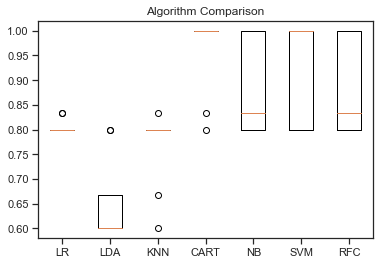

In [21]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### Bibliography

- Chung C.F. & Agterberg F. P. (1980). Regression models for estimating resources from Geological Map Data. Mathematical Geology, Vol. 12 No. 5.